In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

Data description is as follows;

*   Response (target) - 1 if customer accepted the offer in the last 
campaign, 0 otherwise
*   ID - Unique ID of each customer
*   Year_Birth - Age of the customer
*   Complain - 1 if the customer complained in the last 2 years
*   Dt_Customer - date of customer's enrollment with the company
*   Education - customer's level of education
*   Marital - customer's marital status
*   Kidhome - number of small children in customer's household
*   Teenhome - number of teenagers in customer's household
*   Income - customer's yearly household income
*   MntFishProducts - the amount spent on fish products in the last 2 years
*   MntMeatProducts - the amount spent on meat products in the last 2 years
*   MntFruits - the amount spent on fruits products in the last 2 years
*   MntSweetProducts - amount spent on sweet products in the last 2 years
*   MntWines - the amount spent on wine products in the last 2 years
*   MntGoldProds - the amount spent on gold products in the last 2 years
*   NumDealsPurchases - number of purchases made with discount
*   NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
*   NumStorePurchases - number of purchases made directly in stores
*   NumWebPurchases - number of purchases made through the company's website
*   NumWebVisitsMonth - number of visits to company's website in the last month
*   Recency - number of days since the last purchase
---







In [309]:
#Loading dataset
data = pd.read_csv('/content/superstore_data.csv')

# New Section

In [310]:
data.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


In [311]:
data.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [312]:
data['Response'] = data['Response'].astype(np.object)

In [313]:
data.describe()


,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [314]:
data.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

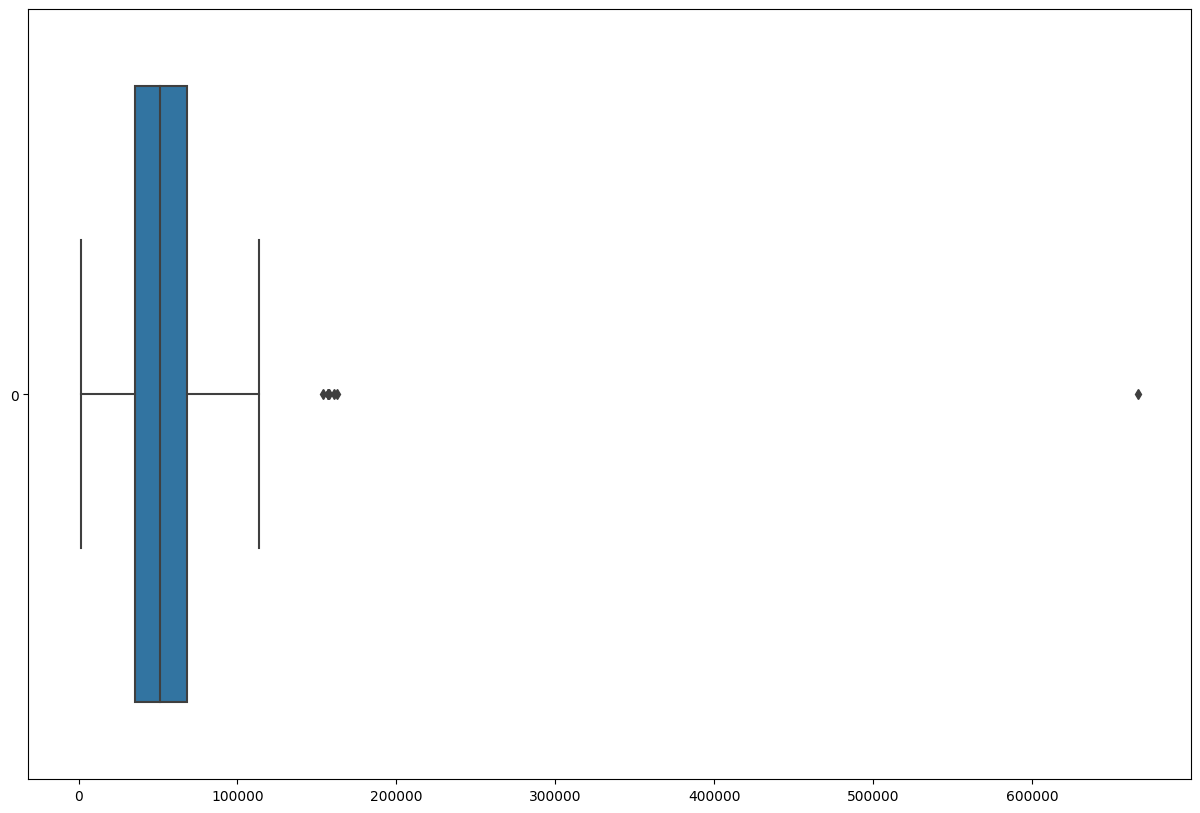

In [315]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data.Income, orient='h')
plt.show

In [316]:
#There are some outliers present in the Income column, therfore, it is better to replace missing values with the median. 
data.Income.fillna(round(data.Income.median()), inplace=True)



In [317]:
data.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [318]:
import datetime as dt
#Creating new feature
today = dt.date.today()
year = today.year
data['Age'] = year - data.Year_Birth
data.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0,34,2,3,1,2,7,1,0,34
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,32,43,1,4,7,5,2,1,0,65
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,34,65,1,10,10,7,6,1,0,69
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,7,1,2,1,3,5,0,0,56
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,32,5,3,6,2,9,4,0,0,69
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,32,5,3,6,2,9,4,0,0,69


In [319]:
data.corr()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
Id,1.000000,0.000028,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,0.033883,-0.000028
Year_Birth,0.000028,1.000000,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,-0.030128,-1.000000
Income,0.012996,-0.160899,1.000000,-0.425326,0.018966,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,-0.082315,0.380554,0.586826,0.526600,-0.549785,-0.027187,0.160899
Kidhome,0.002406,0.230176,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.040207,-0.230176
Teenhome,-0.002580,-0.352111,0.018966,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.003138,0.352111
Recency,-0.046524,-0.019871,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.013231,0.019871
MntWines,-0.022878,-0.157773,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,-0.039007,0.157773
MntFruits,0.004600,-0.017917,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,-0.005166,0.017917
MntMeatProducts,-0.004437,-0.030872,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,-0.023483,0.030872
MntFishProducts,-0.024475,-0.041625,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,-0.020953,0.041625


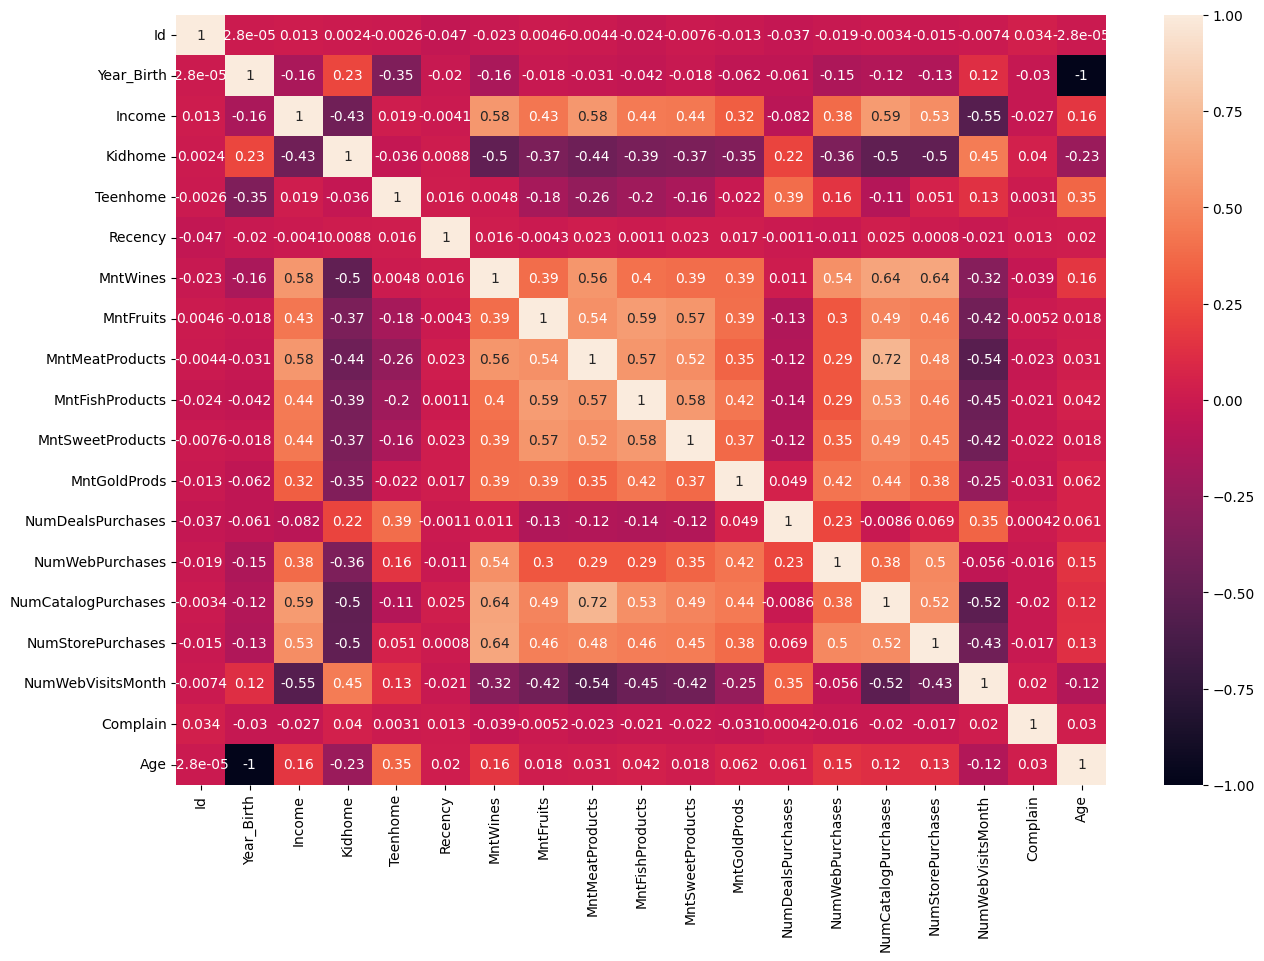

In [320]:
#Visualizing the correlation of data 
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [321]:
#Dropping unnecessary columns, also we drop "Year_Birht" bacuase we substitue it with the "Age" column. Other than that, there is no variables that would be highly correlated, therefore, there is no need to drop anything else.  
data = data.drop(['Id', 'Dt_Customer', 'Year_Birth'], axis=1)
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,47
2236,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,46
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,47
2238,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,45


<function matplotlib.pyplot.show(close=None, block=None)>

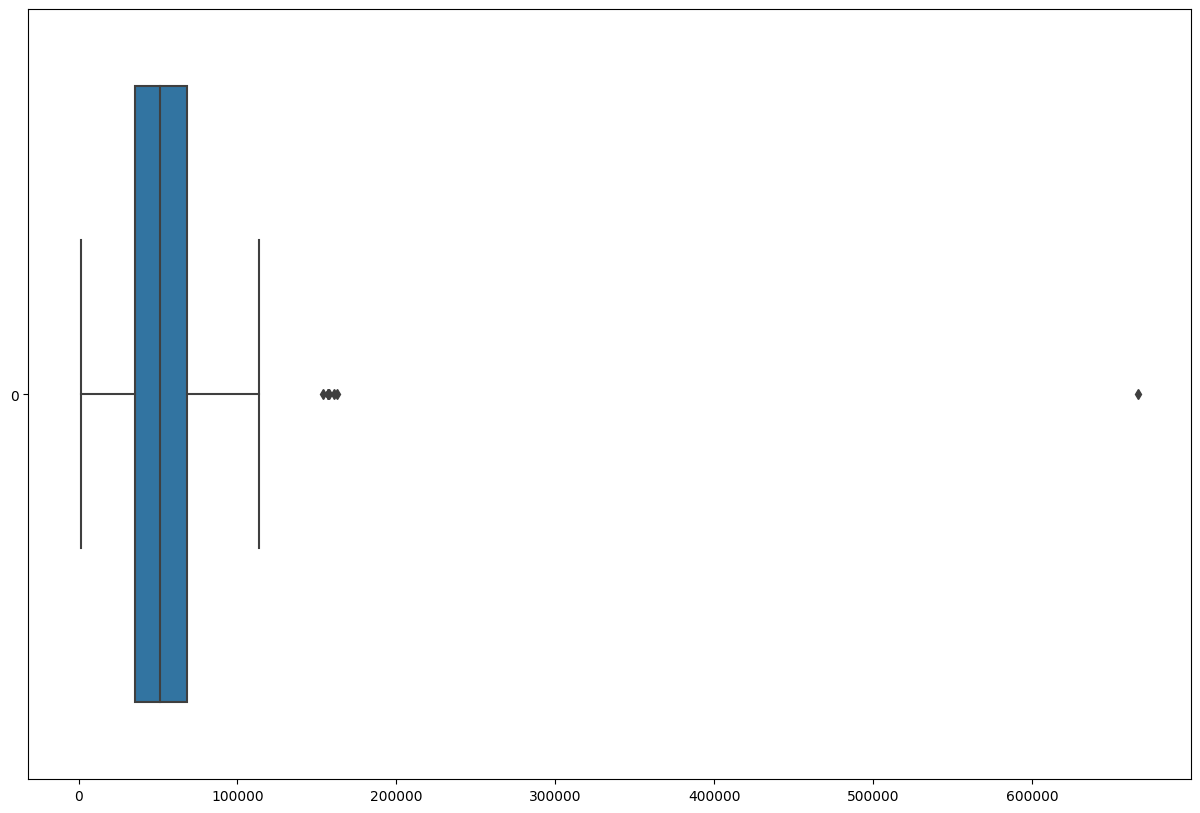

In [322]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data.Income, orient='h')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

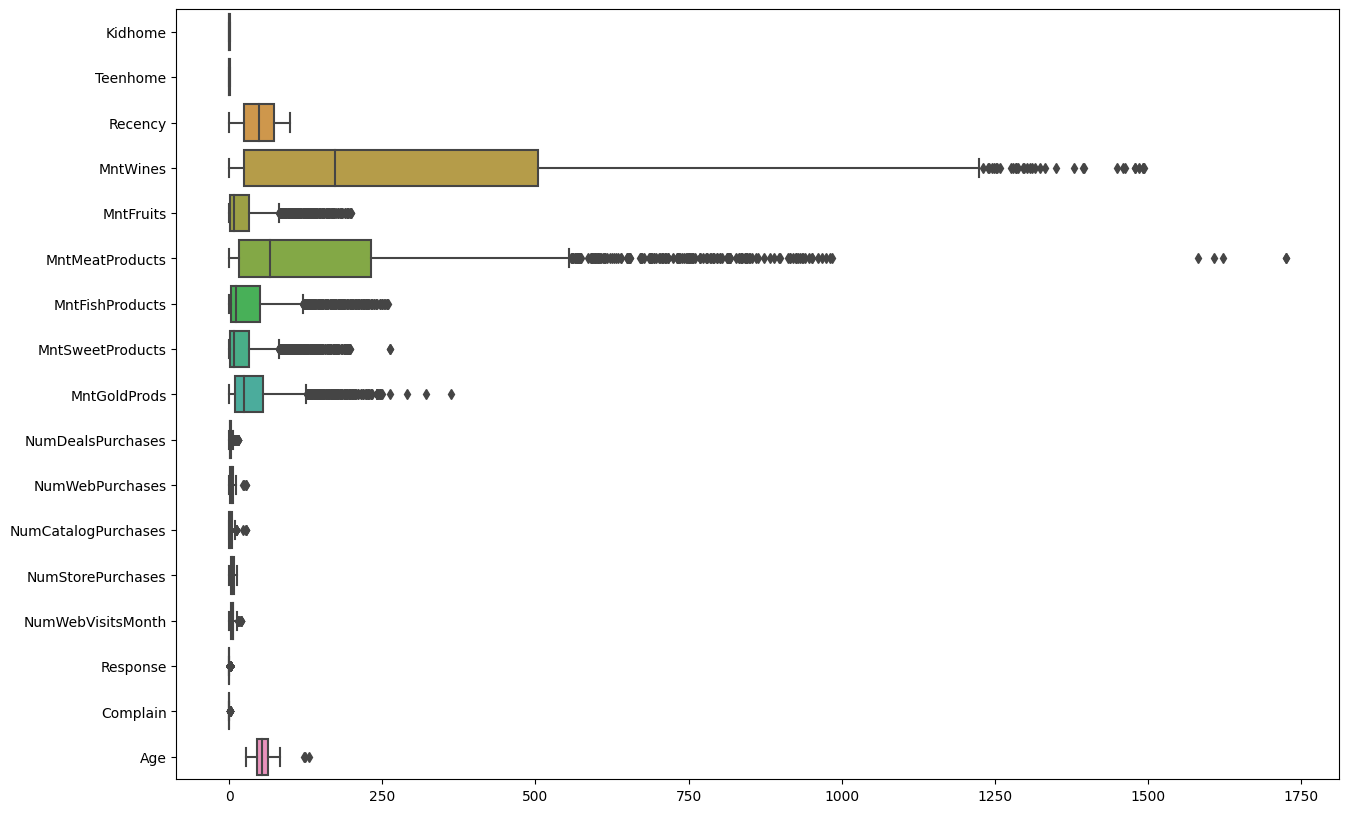

In [323]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data.drop(['Income'], axis=1), orient='h')
plt.show

In [324]:
#As we can see in the boxpolots, there are multiple outliers in each of the columns, in order to normalize data, we will use Interquartile range method to detect and remove them.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34
6,2n Cycle,Married,63564.0,0,0,0,769,80,252,15,34,65,1,10,10,7,6,1,0,69


In [325]:
data.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [326]:
df.Response.value_counts()

0    1361
1     158
Name: Response, dtype: int64

In [327]:
data.shape

(2240, 20)

In [328]:
df.shape

(1519, 20)

In [329]:
#Transforming the categorical data so hte ML model can learn from out dataset
en = LabelEncoder()
df.Education = en.fit_transform(df.Education)
df.Marital_Status = en.fit_transform(df.Marital_Status)
df.Response = en.fit_transform(df.Response)



In [330]:
#All of the values in the "Complain" column equal zero, therefore, we can drop this column
df.Complain.value_counts()


0    1519
Name: Complain, dtype: int64

In [331]:

df = df.drop(['Complain'], axis = 1)

In [332]:
#Selecting target column, and independent variables
y = pd.DataFrame(df['Response'])
x = pd.DataFrame(df.drop(['Response'], axis=1))

In [333]:
#Creating a dataset with standarlized data
x_zscaled = x.apply(zscore)
x_dataset = pd.DataFrame(x_zscaled)
x_dataset

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
1,-0.380642,0.252239,0.787425,-1.047119,-1.028629,-1.686516,1.026581,-0.343881,-0.064124,-0.351979,-0.667177,0.500944,-0.923088,1.481238,0.766575,0.791616,-0.473999,0.744965
2,-0.380642,-0.684560,1.381377,-1.047119,0.811757,-1.686516,-0.209491,0.038470,-0.113678,-0.008066,-0.539820,0.228821,-0.923088,-0.154531,0.253385,0.072868,-2.008099,1.010869
3,-0.380642,1.189037,-0.649417,0.789572,0.811757,-1.686516,-0.673955,-0.662507,-0.688507,-0.652902,-0.667177,-0.937420,-0.923088,-0.972416,-0.772994,-1.005254,0.548734,0.213155
4,-0.380642,0.252239,-1.291464,0.789572,-1.028629,-1.686516,-0.688938,0.357096,-0.460558,-0.180022,-0.667177,0.384320,-0.192029,-0.154531,-0.259804,-1.005254,0.548734,-1.736811
6,-2.132748,-0.684560,1.165241,-1.047119,-1.028629,-1.686516,2.169011,4.435506,1.799116,-0.008066,1.497889,1.589435,-0.923088,2.708064,4.358903,0.791616,0.037368,1.365409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,-0.380642,2.125835,-0.068365,-1.047119,0.811757,1.719379,-0.505400,-0.662507,-0.638953,-0.566924,-0.667177,-0.781921,-0.192029,-0.972416,-0.259804,-0.645880,-0.473999,-0.318654
2234,-0.380642,-1.621358,2.060429,-1.047119,0.811757,1.719379,0.490949,0.038470,2.364034,0.765738,0.988461,0.384320,0.539029,2.299122,0.766575,0.072868,-0.985365,-0.318654
2235,1.371464,-1.621358,1.335208,-1.047119,0.811757,1.719379,0.681979,0.484546,0.550349,1.367586,2.389386,2.094806,-0.192029,0.663353,0.253385,2.229112,-0.985365,-0.584558
2236,-2.132748,-0.684560,-0.732183,0.789572,-1.028629,1.719379,-0.692683,-0.025255,-0.569577,-0.523935,-0.157750,-0.315425,-0.923088,-0.972416,-0.772994,-0.645880,1.060101,-0.673193


In [334]:
#Performing PCA
#We create a confusion matrix 
covMatrix = np.cov(x,rowvar=False)
covMatrix.shape

(18, 18)

In [335]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 18)
pca.fit(x)

PCA(n_components=18)

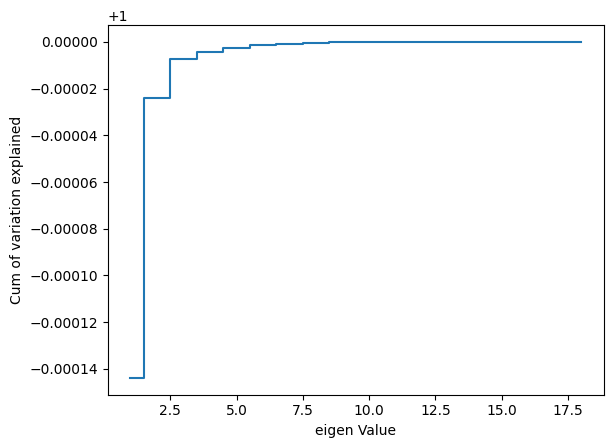

In [336]:
#Elbow visualisation of variance in the Eigen vectors

plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [337]:
pca1 = PCA(n_components=4)
pca1.fit(x)

x_pca = pca1.transform(x)

In [338]:
x.shape

(1519, 18)

In [339]:
y.shape

(1519, 1)

In [340]:
#Splitting dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size= 0.3, random_state= 42)

In [341]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [342]:
#Creating machine learning models, Support Vector Machine, Decision Tree Classifier, and Logistic Regression are considered the best models for binary classification
svc = SVC()
svc_model = svc.fit(x_train, y_train)
svc_predict = svc_model.predict(x_test)

tree = DecisionTreeClassifier(criterion='gini')
tree_model = tree.fit(x_train, y_train)
tree_predict = tree_model.predict(x_test)

reg = LogisticRegression()
reg_model = reg.fit(x_train, y_train)
reg_predict = reg_model.predict(x_test)

In [343]:
#Creating a function that will dislplay the accuracy of our models
from sklearn.model_selection import KFold, cross_val_score
scores = {'Model': [], 'Score' : [], 'Std' : []}
def model_score(model, model_name, model_predict):

  scores['Model'].append(model_name)
  kfold = KFold(n_splits= 10, random_state= 42, shuffle=True)
  val_scores = cross_val_score(model, x_train, y_train, scoring= 'accuracy')
  scores['Score'].append(val_scores.mean())
  scores['Std'].append(val_scores.std())




In [344]:
model_score(svc_model, 'SVC', svc_predict)

model_score(tree_model, 'DecisionTreeClassifier', tree_predict)

model_score(reg_model, 'LogisticRegression', reg_predict)

In [345]:
#Using GridSearchCV for parameter tuning
from sklearn.model_selection import GridSearchCV
parameters_tree = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 5, 8, 10]} 
  

grid_tree = GridSearchCV(estimator=tree_model, param_grid=parameters_tree, refit=True, cv=10, verbose=True)
grid_tree.fit(x_train, y_train)

print(grid_tree.best_params_, grid_tree.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'criterion': 'gini', 'max_depth': 4} 0.8918268383001233


In [346]:
parameters_svc = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  

grid_svc = GridSearchCV(estimator=svc_model, param_grid=parameters_svc, refit=True, cv=10, verbose=True)
grid_svc.fit(x_train, y_train)

print(grid_svc.best_params_, grid_svc.best_score_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 0.8984217950978663


In [347]:
parameters_reg = {'C':np.logspace(-3,3,10), 'penalty' : ['l1','l2']}
  

grid_reg = GridSearchCV(estimator=reg_model, param_grid=parameters_reg, refit=True, cv=10, verbose=True)
grid_reg.fit(x_train, y_train)

print(grid_reg.best_params_, grid_reg.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 215.44346900318823, 'penalty': 'l2'} 0.8936959971786281


In [348]:
#Parameter tuning
svc_params = SVC(C= 1, gamma = 0.1, kernel = 'rbf')
svc_model_params = svc_params.fit(x_train, y_train)
svc_params_predict = svc_model_params.predict(x_test)

tree_params = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
tree_model_params = tree_params.fit(x_train, y_train)
tree_params_predict = tree_model_params.predict(x_test)

reg_params = LogisticRegression(C = 215.44346900318823, penalty = 'l2')
reg_model_params = reg_params.fit(x_train, y_train)
reg_params_predict = reg_model_params.predict(x_test)

In [349]:
svc_params_pca = SVC(C= 1, gamma = 0.1, kernel = 'rbf')
svc_model_params_pca = svc_params_pca.fit(x_train_pca, y_train_pca)
svc_params_predict_pca = svc_model_params_pca.predict(x_test_pca)

tree_params_pca = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
tree_model_params_pca = tree_params_pca.fit(x_train_pca, y_train_pca)
tree_params_predict_pca = tree_model_params_pca.predict(x_test_pca)

reg_params_pca = LogisticRegression(C = 215.44346900318823, penalty = 'l2')
reg_model_params_pca = reg_params_pca.fit(x_train_pca, y_train_pca)
reg_params_predict_pca = reg_model_params_pca.predict(x_test_pca)

In [350]:

model_score(svc_model_params, 'SVC best params', svc_params_predict)

model_score(tree_model_params, 'DecisionTreeClassifier best params', tree_params_predict)

model_score(reg_model_params,'LogisticRegression best params', reg_params_predict)


In [351]:
model_score(svc_model_params_pca, 'SVC (pca) best params', svc_params_predict_pca)

model_score(tree_model_params_pca, 'DecisionTreeClassifier (pca) best params', tree_params_predict_pca)

model_score(reg_model_params_pca,'LogisticRegression (pca) best params', reg_params_predict_pca)

In [352]:
#Displaying the table that compares all the models 
scores_df = pd.DataFrame(scores)
scores_df.set_index('Model')
scores_df

,Model,Score,Std
0,SVC,0.889937,0.002142
1,DecisionTreeClassifier,0.872052,0.010127
2,LogisticRegression,0.888998,0.003608
3,SVC best params,0.898401,0.007019
4,DecisionTreeClassifier best params,0.888064,0.006740
5,LogisticRegression best params,0.889937,0.004714
6,SVC (pca) best params,0.898401,0.007019
7,DecisionTreeClassifier (pca) best params,0.894645,0.006260
8,LogisticRegression (pca) best params,0.889937,0.004714


In [353]:
#Choosing the best model
best_score = scores_df.loc[scores_df.Score.idxmax()]

In [354]:
print("The best model is %s with accuracy of %0.2f and standard deviation of %0.2f" % (best_score.Model, best_score.Score, best_score.Std))

The best model is SVC best params with accuracy of 0.90 and standard deviation of 0.01
